## JOIN(조인)  
: 두개 이상의 테이블을 하나로 묶어서 하나의 결과 집합으로 만들어 내는 것
- 여러 개의 테이블로 나누어 저장한다. -> 필요할 때 필요한 형태의 데이터로 추출: ① 데이터 무결성 ② 중복을 피함 ③ 데이터 독립성
- 필요할 때 필요한 형태의 데이터로 추출 <- 테이블을 관계 시켜준다.

#### 1. INNER JOIN **
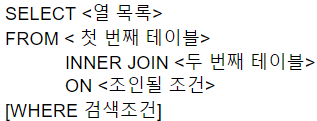
- 조인 중에서 가장 많이 사용 (일반적인 JOIN)
- 활용: 두 테이블을 연결해 줄 때
- WHERE은 선택적(optional)으로 사용 가능하며, 사용하지 않아도 데이터를 추출에 큰 영향이 없다.  
ex) JYP가 구매한 물건 발송 -> ① JPY가 구매한 물건(buytbl)에 ② 'ID'를 기준으로 JYP의 주소(usertbl) JOIN
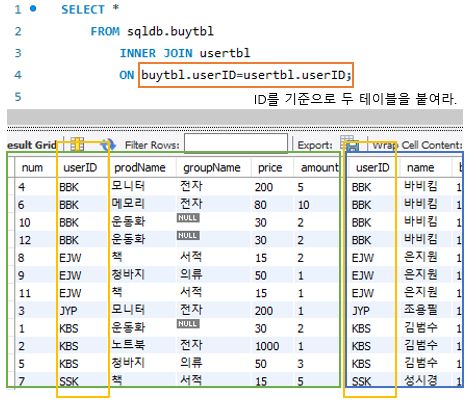
- 주의사항: 두개의 TABLE이 있기 때문에 항상 'TABLE_NAME.열_이름'을 이용하여 조건 등을 지정해 주어야 한다.  
실습1) buytbl과 usertbl을 이용하여 아이디/이름/구매품/주소/연락처만 추출하기
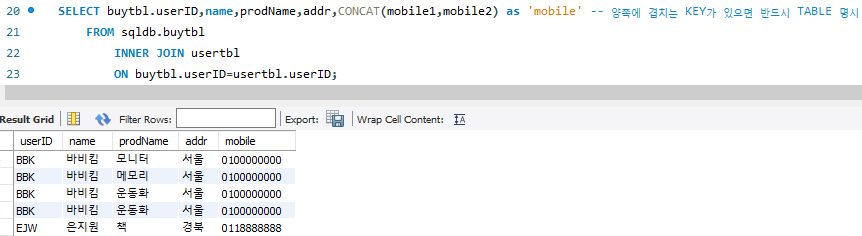
- 참고사항: WHERE을 사용해도 JOIN 가능하나 사용하지 않는다.
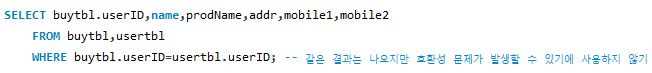
- 매번 테이블 이름을 붙이기 힘들 시에는 'TABLE_NAME 별칭'을 이용하여 선언해 준다.
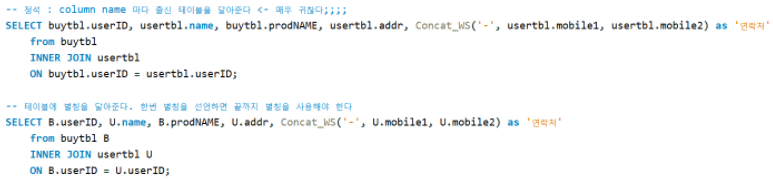  
실습2) 구매이력이 한 번이라도 있는 회원들의 명단을 추출하라.
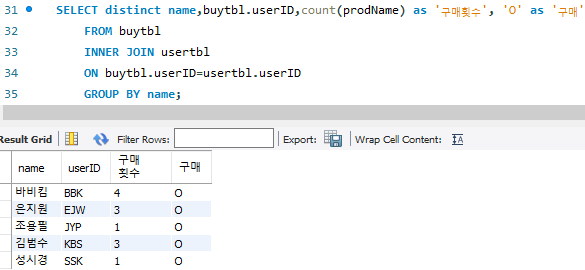

In [ ]:
# 이전에 사용했던 파일을 지우고 새로운 파일 만들기
DROP DATABASE IF EXISTS sqldb; -- 만약 sqldb가 존재하면 우선 삭제한다.
CREATE DATABASE sqldb;

USE sqldb;
CREATE TABLE usertbl -- 회원 테이블
( userID  	CHAR(8) NOT NULL PRIMARY KEY, -- 사용자 아이디(PK)
  name    	VARCHAR(10) NOT NULL, -- 이름
  birthYear   INT NOT NULL,  -- 출생년도
  addr	  	CHAR(2) NOT NULL, -- 지역(경기,서울,경남 식으로 2글자만입력)
  mobile1	CHAR(3), -- 휴대폰의 국번(011, 016, 017, 018, 019, 010 등)
  mobile2	CHAR(8), -- 휴대폰의 나머지 전화번호(하이픈제외)
  height    	SMALLINT,  -- 키
  mDate    	DATE  -- 회원 가입일
);
CREATE TABLE buytbl -- 회원 구매 테이블(Buy Table의 약자)
(  num 		INT AUTO_INCREMENT NOT NULL PRIMARY KEY, -- 순번(PK)
   userID  	CHAR(8) NOT NULL, -- 아이디(FK)
   prodName 	CHAR(6) NOT NULL, --  물품명
   groupName 	CHAR(4)  , -- 분류
   price     	INT  NOT NULL, -- 단가
   amount    	SMALLINT  NOT NULL, -- 수량
   FOREIGN KEY (userID) REFERENCES usertbl(userID)
);

INSERT INTO usertbl VALUES('LSG', '이승기', 1987, '서울', '011', '1111111', 182, '2008-8-8');
INSERT INTO usertbl VALUES('KBS', '김범수', 1979, '경남', '011', '2222222', 173, '2012-4-4');
INSERT INTO usertbl VALUES('KKH', '김경호', 1971, '전남', '019', '3333333', 177, '2007-7-7');
INSERT INTO usertbl VALUES('JYP', '조용필', 1950, '경기', '011', '4444444', 166, '2009-4-4');
INSERT INTO usertbl VALUES('SSK', '성시경', 1979, '서울', NULL  , NULL      , 186, '2013-12-12');
INSERT INTO usertbl VALUES('LJB', '임재범', 1963, '서울', '016', '6666666', 182, '2009-9-9');
INSERT INTO usertbl VALUES('YJS', '윤종신', 1969, '경남', NULL  , NULL      , 170, '2005-5-5');
INSERT INTO usertbl VALUES('EJW', '은지원', 1972, '경북', '011', '8888888', 174, '2014-3-3');
INSERT INTO usertbl VALUES('JKW', '조관우', 1965, '경기', '018', '9999999', 172, '2010-10-10');
INSERT INTO usertbl VALUES('BBK', '바비킴', 1973, '서울', '010', '0000000', 176, '2013-5-5');
INSERT INTO buytbl VALUES(NULL, 'KBS', '운동화', NULL   , 30,   2);
INSERT INTO buytbl VALUES(NULL, 'KBS', '노트북', '전자', 1000, 1);
INSERT INTO buytbl VALUES(NULL, 'JYP', '모니터', '전자', 200,  1);
INSERT INTO buytbl VALUES(NULL, 'BBK', '모니터', '전자', 200,  5);
INSERT INTO buytbl VALUES(NULL, 'KBS', '청바지', '의류', 50,   3);
INSERT INTO buytbl VALUES(NULL, 'BBK', '메모리', '전자', 80,  10);
INSERT INTO buytbl VALUES(NULL, 'SSK', '책'    , '서적', 15,   5);
INSERT INTO buytbl VALUES(NULL, 'EJW', '책'    , '서적', 15,   2);
INSERT INTO buytbl VALUES(NULL, 'EJW', '청바지', '의류', 50,   1);
INSERT INTO buytbl VALUES(NULL, 'BBK', '운동화', NULL   , 30,   2);
INSERT INTO buytbl VALUES(NULL, 'EJW', '책'    , '서적', 15,   1);
INSERT INTO buytbl VALUES(NULL, 'BBK', '운동화', NULL   , 30,   2);

SELECT * FROM usertbl;
SELECT * FROM buytbl;

#### 2. MANY TO MANY 관계 (다대다)  
: 여러 테이블이 연결될 때  

예) 학생-교과목(동아리) -> 이때, ① 학생: 동아리 여러개 가입 가능 ② 학생 여러명 가입 가능

- 반드시 중간에 거쳐가는 '기준 테이블'이 있어야 한다.
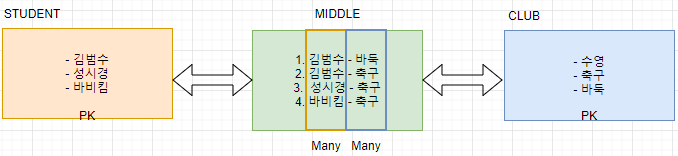

** 이름은 동명이인이 있을 수 있기에, PRIMARY KEY로 잘 사용하지 않는다.

- MANY TO MANY Relationship: TABLE A(stdtbl)에서의 PRIMARY KEY(stdname)를 기준 TABLE(stdclubtbl)의 FOREIGN KEY와 매치시킨 후, 해당되는 또 다른 FK와 TABLE B(clubtbl)의 PK(clubname)를 연결하여 합한다.  
ex) 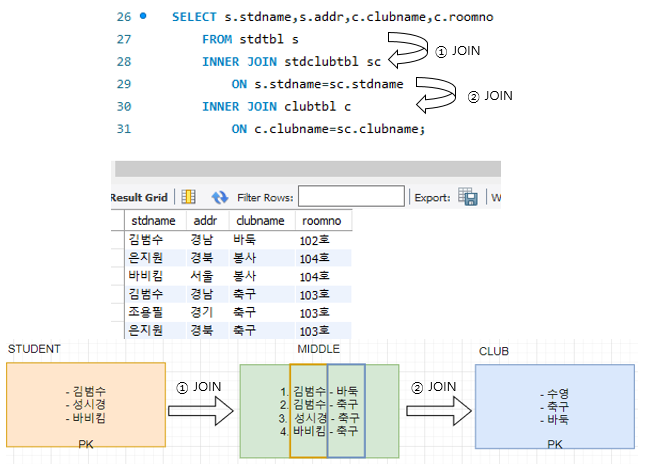  
실습1) 동아리를 기준으로 가입한 학생의 목록을 구하여라.
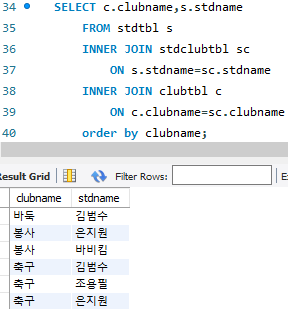

In [ ]:
# 실습 TABLE 수정
DROP DATABASE IF EXISTS sqldb2; -- 만약 sqldb가 존재하면 우선 삭제한다.
CREATE DATABASE sqldb2;
use sqldb2;

create table stdtbl
(stdname varchar(10) NOT NULL primary key,
addr	char(5) not null);

Create table clubtbl
(clubname varchar(10) not null primary key,
roomno char(4) not null
);

Create table stdclubtbl
(num int auto_increment not null primary key,
stdname varchar(10) not null,
clubname varchar(10) not null,
foreign key(stdname) references stdtbl(stdname),
foreign key(clubname) references clubtbl(clubname));

insert into stdtbl values ('김범수', '경남'), ('성시경', '서울'), ('조용필', '경기'), ('은지원', '경북'), ('바비킴','서울');
insert into clubtbl values ('수영', '101호'), ('바둑', '102호'), ('축구', '103호'), ('봉사', '104호');
insert into stdclubtbl values (NULL,'김범수', '바둑'), (NULL,'김범수', '축구'), (NULL,'조용필', '축구'), (NULL,'은지원', '축구'), (NULL,'은지원','봉사'), (NULL,'바비킴','봉사');

#### 3. OUTER JOIN
- INNER JOIN vs OUTER JOIN:  
① INNER JOIN: 매칭이 되는 데이터(조건이 만족되는 row만 포함)만 가져오는 것  
② OUTER JOIN: 매칭이 되지 않는 데이터까지 모두 가져오는 것  
- OUTER JOIN의 종류는 총 3가지이다: 1) left 2) right 3) full outer join
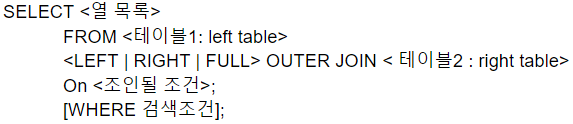  
① LEFT OUTER JOIN: 왼쪽 테이블 정보는 (매칭이 안되더라도) 모두 출력되어야 한다.  
② RIGHT OUTER JOIN: 오른쪽 테이블 정보는 (매칭이 안되더라도) 모두 출력되어야 한다.  
③ FULL OUTER JOIN: LEFT + RIGHT = 모든 테이블 정보는 (매칭이 안되더라도) 모두 출력되어야 한다. (거의 사용할 일 x)  
- WHERE은 선택적(optional)으로 사용 가능하며, 사용하지 않아도 데이터를 추출에 큰 영향이 없다.  
ex) 전체 회원의 구매 기록보기 -> 구매 기록이 없는 회원 포함
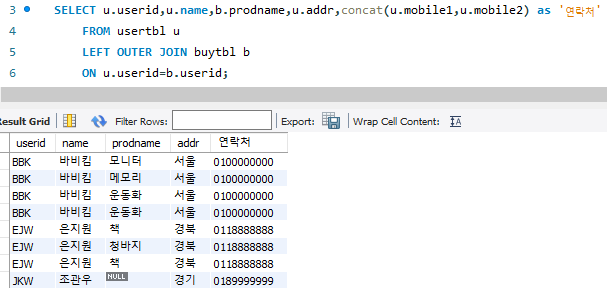  
실습1) 한번도 물건을 구매한 적이 없는 휴면회원 리스트를 출력하시오.
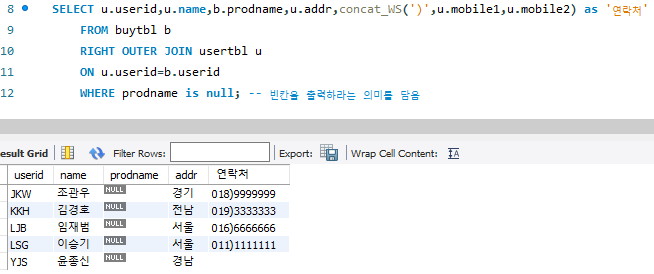  
실습2) 동아리에 하나도 가입하지 않은 학생과 등록 학생이 하나도 없는 동아리를 모두 출력하시오.
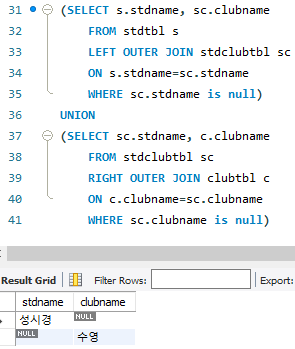

#### 4. CROSS JOIN  
: 한쪽 테이블의 모든 row를 다른쪽 테이블에 JOIN시킨다.
- CROSS JOIN하면 결과 테이블의 크기가 두 테이블 개수를 곱한 크기가 된다.
- 관계가 있고 없고와 상관없이 모두 다 붙인다.
- 이는 SAMPLE(가상) DATA를 만들어서 그것을 test할 때 사용한다. -> 실제 데이터 생성 시 어떻게 될지 미리 확인 (용량이 크면 DOWN)  
ex) 4개의 clubtbl과 5개의 stdtbl이 만나 20개의 row 형성
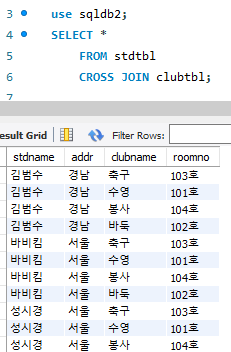

## UNION  
: 동일한 열_이름을 사용한 테이블들을 하나로 합치는 것
- 주의사항: 열의 갯수가 같아야 하며, 같은 이름의 열을 사용해야 한다.
- 반드시 (쿼리)가 끝나고 ' ; '를 붙이지 않아야 한다.
1. UNION: 중복되지 않는 유일한 정보로 추출하는 경우
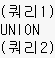
2. UNION ALL: 중복 포함 모든 정보를 추출하는 경우
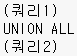